In [135]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [129]:
import astropy.units as u
from astropy.constants import M_sun, R_sun, G
import numpy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'size'   : 18}

rc('font', **font)

# Q1
### a.
Using the relation 
$$L/L_\odot = (R / R_\odot)^2(T_{eff}/5777K)^4$$
Where $L/L_\odot = 10^{5.5}$ and $T_{eff} = 2700\,K$, we get that $$R = 2.574\times10^3R_\odot = \fbox{$1.79\times10^{14}\,cm$}$$
### b.
The mean density can be found by 
$$\bar{\rho} = \frac{3}{4\pi}MR^{-3} \\ \bar{\rho} = (M/M_\odot)(R/R_\odot)^{-3} \bar{\rho}_\odot \\ 
\bar{\rho} = 1.79\times10^{-9} \bar{\rho}_\odot = \fbox{$1.65\times10^{-9}\,\frac{g}{cm^3}$}$$
### c.
The escape velocity $v_{esc}$ is given by $$v_{esc} = \sqrt{\frac{2GM}{R}}$$ So the escape velocity at the surface of this star is 
$$
v_{esc} = \Big(\frac{M/M_\odot}{R/R_\odot}\Big)^\frac{1}{2}\sqrt{\frac{2GM_\odot}{R_\odot}} \\
v_{esc} = 0.09\times v_{esc,\odot} = \fbox{$5.44 \times 10^6 \, \frac{cm}{s}$} \\
$$
### d.
This star is much larger than the sun, but has a much lower mean density, resulting in a lower surface escape velocity even though it is more massive than the sun.

In [131]:
T_eff = 2700 * u.K
R = (10 ** 5.5 / (T_eff/ (5777 * u.K)) ** 4) ** (1/2) * R_sun
rho_sun = (3/(4 * np.pi) * M_sun * R_sun ** -3).cgs
rho = (20 * (R/R_sun) ** -3).cgs

In [132]:
print("Radius of star")
R.cgs

Radius of star


<Quantity 1.79101495e+14 cm>

In [133]:
print("Density of star")
rho * rho_sun

Density of star


<Quantity 1.65253119e-09 g / cm3>

In [134]:
print("Escape velocity of star")
v_esc = np.sqrt(2 * G * 20 * M_sun / (R)).cgs
v_esc

Escape velocity of star


<Quantity 5444226.78136267 cm / s>

In [38]:
sm1 = pd.read_csv('data/M001Z14V0.dat', delim_whitespace=True, skiprows=[1])
sm12 = pd.read_csv('data/M012Z14V0.dat', delim_whitespace=True, skiprows=[1])
sm120 = pd.read_csv('data/M120Z14V0.dat', delim_whitespace=True, skiprows=[1])

im = plt.imread('data/EOS_figure.jpg')

# Q2
The Virial theorem states that $$E_{kin} = -\frac{1}{2}E_{pot}$$ In the center of mass frame, we have two bodies orbiting around their center of mass. Assuming circular orbits, the bodies orbit with constant velocity, giving a total kinetic energy of $$E_kin = \frac{1}{2}Mv_1^2 + \frac{1}{2}mv_2^2$$ Letting $a = a_1 + a_2$ the total distance between the two bodies, we get that the gravitational potential energy is $$-\frac{GMm}{a_1 + a_2} = -frac{GMm}{a}$$ 

Since the orbits are circular, we can rewrite velocity as the speed it takes to travel the circumference of one orbit over the period of the orbit $$ v_1 = \frac{2\pi a_1}{P} \\ v_2 = \frac{2\pi a_2}{P}$$ Where the period $P$ is the same for both bodies. We also know that the distance between each body and the center of mass is weighted by the mass of the other body: $$a_1 = \frac{m}{M + m}a \\ a_2 = \frac{M}{M + m}a$$ Substituting these equations into $E_{kin}$, we get that 
$$E_{kin} = \frac{1}{2}Mv_1^2 + \frac{1}{2}mv_2^2 \\
= \frac{1}{2}M\Big(\frac{2\pi}{P}\frac{m}{M + m}a\Big)^2  + \frac{1}{2} m\Big(\frac{2\pi}{P}\frac{M}{M + m}a\Big)^2 \\
= \frac{1}{2}\Big(\frac{2\pi a}{P}\Big)^2 \frac{mM}{(M + m)^2} (m + M) \\
= \frac{1}{2}\Big(\frac{2\pi}{P}\Big)^2 \frac{mM}{(M + m)} a^2
$$
Plugging this into the Virial Theorem we get:
$$
E_{kin} = -\frac{1}{2}E_{pot} \\
\frac{1}{2}\Big(\frac{2\pi}{P}\Big)^2 \frac{mM}{(M + m)} a^2 = -\frac{1}{2}\Big(-\frac{GMm}{a}\Big) \\
\fbox{$\Big(\frac{2\pi}{P}\Big)^2 = \frac{G(M+m)}{a^3}$}
$$
Which is Keplers 3rd Law.

# Q3

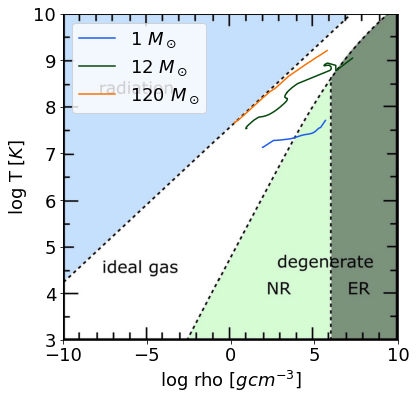

In [74]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(sm1['lg(rhoc)'], sm1['lg(Tc)'], color='xkcd:azul', label='1 $M_\odot$')
ax.plot(sm12['lg(rhoc)'], sm12['lg(Tc)'], color='xkcd:forest green', label='12 $M_\odot$')
ax.plot(sm120['lg(rhoc)'], sm120['lg(Tc)'], color='xkcd:orange', label='120 $M_\odot$')
ax.set_xlim([-10, 10])
ax.set_ylim([3, 10])
ax.set_xlabel('log rho [$g cm^{-3}$]')
ax.set_ylabel('log T [$K$]')
ax.imshow(im, extent=[-10, 10, 3, 10])
ax.set_aspect('auto', adjustable='box')
plt.legend()
plt.show()

We see for the evolution of 1 $M_\odot$ star, the central density and temperature both increase over its lifetime. The end state of the core of star is in a degenerate non-relativistic state,, corresponding to a white dwarf. The 12 $M_\odot$ star displays more complex evolution ending in a degenerate relativistic state, i.e. a neutron star. Each of the bends likely correspond to the start of a new variety of nuclear burning. The 120 $M_\odot$ star is nearly radiation dominated for its entire lifecycle, becoming less so near the end of its life as it puffs off its outer layers. The end state of such a massive star is a black hole is reflected in the fact that the curve just ends (when really the next point would have undefined central density).

By plotting the curves as a scatterplot and zooming in, we can see some of the relative time scale. For example, the 1 $M_\odot$ star spends the majority of its life burning hydrogen, with the kink representing the onset of core helium burning, which lasts for a much shorter perood of time. Additionallym we see the jumps in central density in thte more massive stars which amy correspond to the onset of different species of fusion, which occure in more rapid succession as the elements become denser.

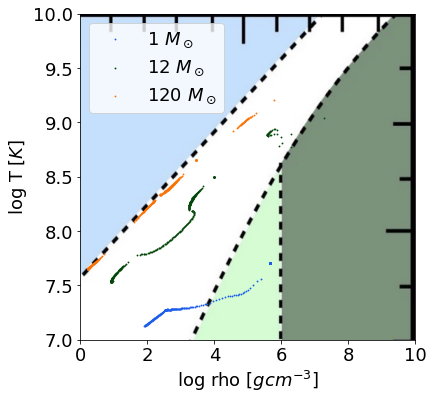

In [75]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(sm1['lg(rhoc)'], sm1['lg(Tc)'], color='xkcd:azul', label='1 $M_\odot$', s=.7)
ax.scatter(sm12['lg(rhoc)'], sm12['lg(Tc)'], color='xkcd:forest green', label='12 $M_\odot$', s=.7)
ax.scatter(sm120['lg(rhoc)'], sm120['lg(Tc)'], color='xkcd:orange', label='120 $M_\odot$', s=.7)
ax.set_xlim([0, 10])
ax.set_ylim([7, 10])
ax.set_xlabel('log rho [$g cm^{-3}$]')
ax.set_ylabel('log T [$K$]')
ax.imshow(im, extent=[-10, 10, 3, 10])
ax.set_aspect('auto', adjustable='box')
plt.legend()
plt.show()

In [77]:
df = pd.read_csv('data/appendix_d.dat', delim_whitespace=True)

# Q4

### a.
Electron scattering tends to dominate at high temperatures, where the star is highly ionized. This temperature depends both the temperature and density: at $\rho=10^{2}$, electron scattering dominates above $10^{7.5}K$, whereas at $\rho=10^{-6}$, electron scattering dominates above $10^{5.5}K$. See the figure below for regimes where eletron scattering dominates and where f-f and bound-free scattering dominates.

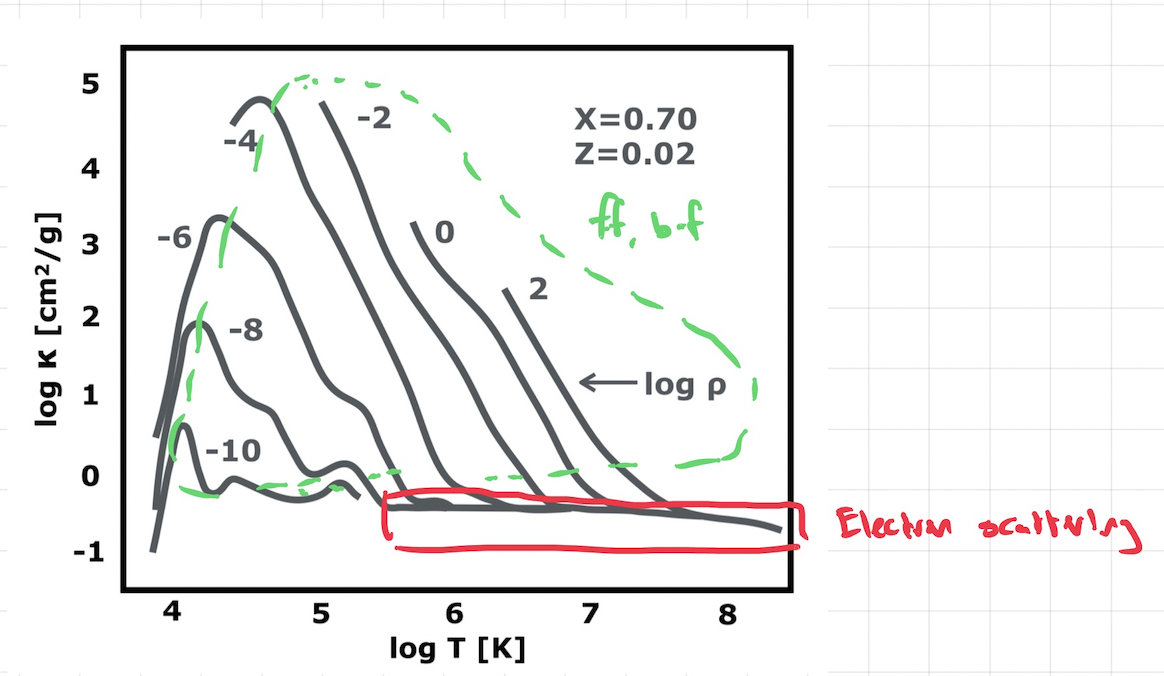

### b.
Doing point estimate using the plot above, we select $\rho=10^{-2}$. Since this is a log-log plot, we can find the exponent $\alpha$ of our model $\kappa \propto T^{\alpha}$ by just finding the slope of that curve on the f-f, b-f dominated section:
$$
slope \approx \frac{4.8 - 0.7}{5.3 - 6.6} = -3.2
$$ 
This is pretty close to our theoretical value of $\alpha = -7/2$, pretty good for a point estimate.

# Q5

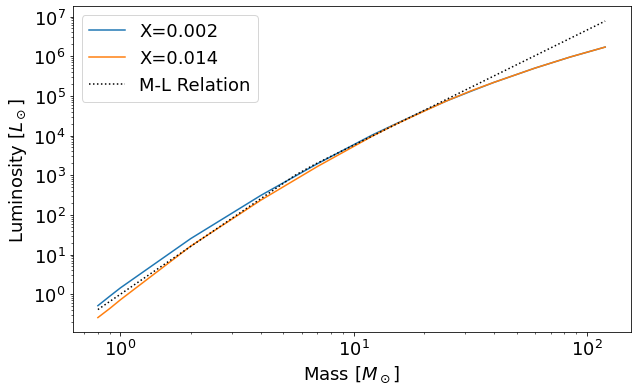

In [98]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(df['Mass'], 10 ** df['0.002'], label='X=0.002')
ax.plot(df['Mass'], 10 ** df['0.014'], label='X=0.014')
ax.plot(np.linspace(df.Mass.min(), df.Mass.max(),100), 
        [m**4 if m < 6 else m**2.9 * 6 **1.1 for m in np.linspace(df.Mass.min(), df.Mass.max(), 100)], 
        color='k', ls=':', label='M-L Relation')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mass [$M_\odot$]')
ax.set_ylabel('Luminosity [$L_\odot$]')
plt.legend()
plt.show()

### a.
At high mass, stars become radiation pressure dominated and are thus fainter than the Mass-Luminosity Relation would imply. 
### b.
At high masses (and temperatures), scattering is dominated by electron scattering, which is independent of metalicity. We see that above around a few solar masses, the luminosity relations are nearly identical for the two metalicities, which backs this up.

At low masses (and temperatures), scattering is dominated by bound-free scattering which is dependent on the metalicity of the star, especially since the valence electrons of metals often have much lower ionization energies relative to hydrogen and helium. As a result, the opacity of low metalicity stars is lower, meaning they appear more luminous. This effect decreases as electron scattering becomes the dominant mechanism, since this is independent of metalicity.

Text(0.5, 0, 'Mass [$M_\\odot$]')

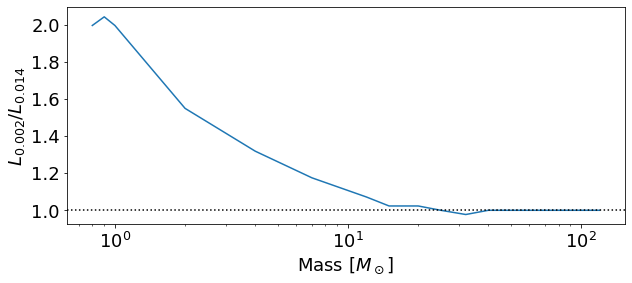

In [113]:
plt.figure(figsize=(10,4))
plt.plot(df['Mass'], 10 ** df['0.002'] / 10 ** df['0.014'])
plt.axhline(1, ls=':', color='k')
plt.xscale('log')
plt.ylabel('$L_{0.002}/L_{0.014}$')
plt.xlabel('Mass [$M_\odot$]')


# Q6
### a.
Drawing arbitrary upper and lower limits of convection on the below graph, representing the range of radii where the Schwarzchild criterion is satisfied:
$$
\Big|\frac{dT}{dr}\Big|_{rad} > \Big|\frac{dT}{dr}\Big|_{ad}
$$

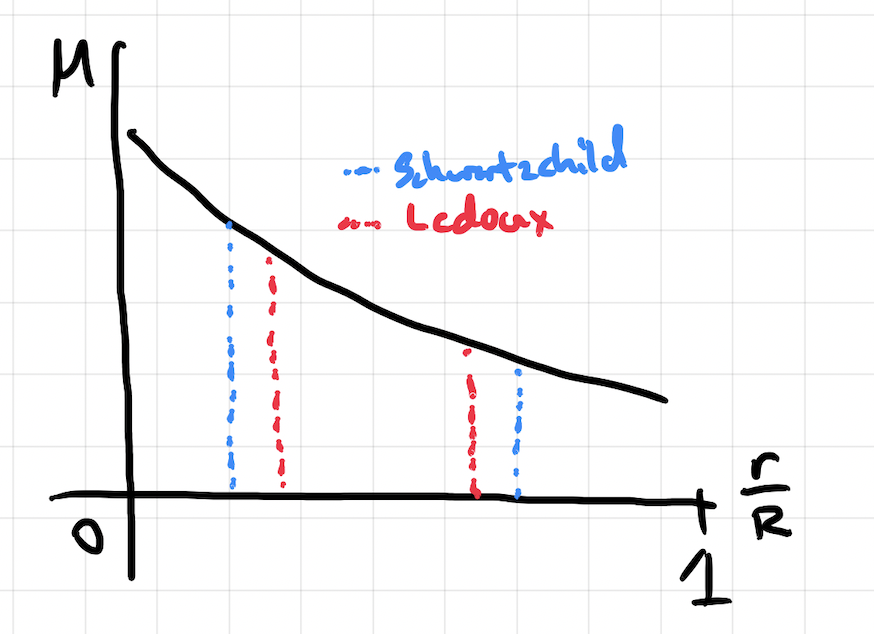
### b. 
To satisfy the Ledoux criterion, the right hand side of the inequality must now overcome two "bouyancy" gradients. 
$$
\Big|\frac{dT}{dr}\Big|_{rad} > \Big|\frac{dT}{dr}\Big|_{ad} + \Big|\frac{d\mu}{dr}\Big|
$$
As a result, not every radius satisfying the Schwarzchild criterion also satisfies the Ledoux criterion, since that additional term is always positive. This has the effect of shrinking the zone of convection, as seen above. 

### c.
In the convective zone, the stellar gas becomes mixed, which means that the mean particle mass will also be mixed and even in that region.

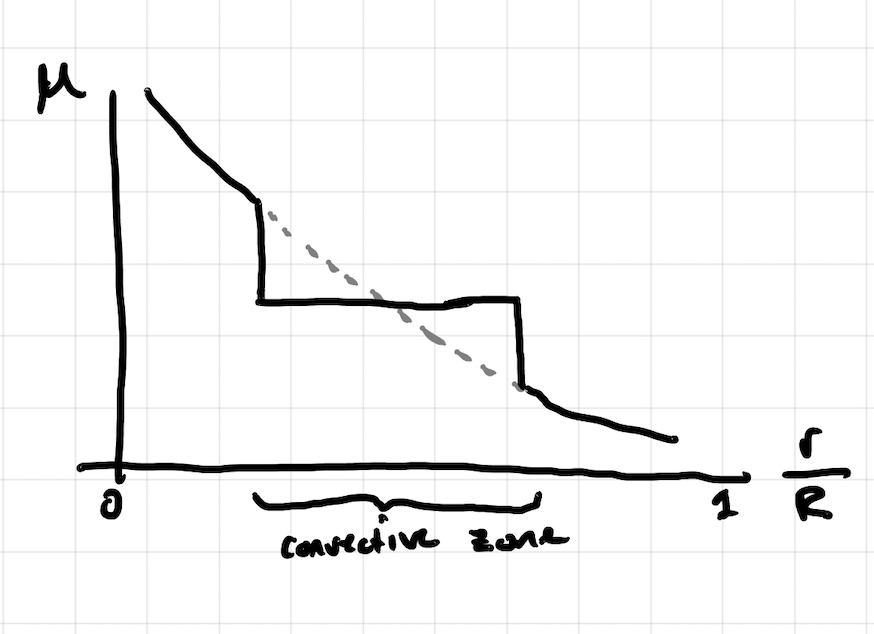